In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy import signal
import scipy.integrate as integrate
import scipy.fftpack as ff

%matplotlib inline

# 1. Signal lecture - using A0001 sample
#### Please note: 
For easier data analysis and features visualization, please use pandas (since its easier to use). But for the final signal (the one we need to integration), please use numpy format (convert to numpy using "signal.values")

In [2]:
A0001 = f'A0001.csv'
df = pd.read_csv(A0001, sep=',')

In [3]:
df.head(12)

,2.800000000000000000e+01,3.900000000000000000e+01,4.500000000000000000e+01,4.900000000000000000e+01,5.400000000000000000e+01,5.600000000000000000e+01,5.800000000000000000e+01,6.000000000000000000e+01,6.000000000000000000e+01.1,6.100000000000000000e+01,...,2.480000000000000000e+02.14,2.500000000000000000e+02.10,2.510000000000000000e+02.8,2.520000000000000000e+02.6,2.530000000000000000e+02.13,2.540000000000000000e+02.11,2.560000000000000000e+02.5,2.580000000000000000e+02.7,2.590000000000000000e+02.3,2.590000000000000000e+02.4
0,7.0,11.0,15.0,17.0,20.0,24.0,29.0,35.0,41.0,48.0,...,234.0,238.0,240.0,242.0,244.0,245.0,246.0,248.0,249.0,250.0
1,-21.0,-28.0,-30.0,-32.0,-34.0,-32.0,-29.0,-25.0,-19.0,-13.0,...,-14.0,-12.0,-11.0,-10.0,-9.0,-9.0,-10.0,-10.0,-10.0,-9.0
2,-17.0,-24.0,-29.0,-32.0,-36.0,-39.0,-42.0,-47.0,-50.0,-54.0,...,-240.0,-243.0,-245.0,-246.0,-248.0,-249.0,-251.0,-252.0,-254.0,-254.0
3,24.0,33.0,38.0,41.0,44.0,44.0,44.0,42.0,39.0,36.0,...,131.0,131.0,131.0,131.0,131.0,131.0,132.0,134.0,134.0,134.0
4,-7.0,-9.0,-7.0,-7.0,-7.0,-4.0,0.0,4.0,10.0,16.0,...,109.0,112.0,114.0,115.0,117.0,117.0,117.0,118.0,118.0,120.0
5,-290.0,-304.0,-317.0,-329.0,-342.0,-353.0,-364.0,-373.0,-382.0,-390.0,...,-545.0,-556.0,-566.0,-576.0,-584.0,-592.0,-600.0,-605.0,-610.0,-614.0
6,-204.0,-212.0,-219.0,-226.0,-233.0,-239.0,-246.0,-251.0,-258.0,-264.0,...,-420.0,-427.0,-434.0,-439.0,-443.0,-445.0,-447.0,-449.0,-450.0,-450.0
7,-96.0,-100.0,-105.0,-109.0,-111.0,-113.0,-114.0,-114.0,-114.0,-113.0,...,-100.0,-101.0,-102.0,-103.0,-103.0,-102.0,-102.0,-102.0,-101.0,-99.0
8,-112.0,-110.0,-108.0,-105.0,-100.0,-96.0,-90.0,-82.0,-74.0,-65.0,...,176.0,180.0,184.0,187.0,189.0,191.0,192.0,194.0,194.0,195.0
9,-596.0,-590.0,-582.0,-573.0,-561.0,-551.0,-538.0,-526.0,-513.0,-500.0,...,291.0,296.0,301.0,304.0,306.0,307.0,307.0,307.0,307.0,307.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Columns: 7500 entries, 2.800000000000000000e+01 to 2.590000000000000000e+02.4
dtypes: float64(7500)
memory usage: 644.7 KB


In [5]:
df.describe(include='all')

,2.800000000000000000e+01,3.900000000000000000e+01,4.500000000000000000e+01,4.900000000000000000e+01,5.400000000000000000e+01,5.600000000000000000e+01,5.800000000000000000e+01,6.000000000000000000e+01,6.000000000000000000e+01.1,6.100000000000000000e+01,...,2.480000000000000000e+02.14,2.500000000000000000e+02.10,2.510000000000000000e+02.8,2.520000000000000000e+02.6,2.530000000000000000e+02.13,2.540000000000000000e+02.11,2.560000000000000000e+02.5,2.580000000000000000e+02.7,2.590000000000000000e+02.3,2.590000000000000000e+02.4
count,11.000000,11.000000,11.000000,11.00000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0000,11.000000
mean,-120.727273,-121.818182,-122.000000,-122.00000,-121.454545,-120.363636,-118.454545,-116.000000,-113.181818,-110.090909,...,-17.181818,-16.909091,-17.000000,-17.272727,-17.363636,-17.727273,-18.454545,-18.545455,-19.0000,-18.727273
std,185.479428,186.285704,186.976469,187.36702,187.468591,188.215978,188.890637,189.755105,191.051207,192.394103,...,278.055684,283.283411,287.871152,291.684793,294.890920,297.261532,299.612871,301.411467,302.8214,303.802927
min,-596.000000,-590.000000,-582.000000,-573.00000,-561.000000,-551.000000,-538.000000,-526.000000,-513.000000,-500.000000,...,-545.000000,-556.000000,-566.000000,-576.000000,-584.000000,-592.000000,-600.000000,-605.000000,-610.0000,-614.000000
25%,-158.000000,-161.000000,-163.500000,-167.50000,-172.000000,-176.000000,-180.000000,-182.500000,-186.000000,-188.500000,...,-170.000000,-172.000000,-173.500000,-174.500000,-175.500000,-175.500000,-176.500000,-177.000000,-177.5000,-176.500000
50%,-21.000000,-28.000000,-30.000000,-32.00000,-36.000000,-39.000000,-42.000000,-47.000000,-50.000000,-54.000000,...,109.000000,112.000000,114.000000,115.000000,117.000000,117.000000,117.000000,118.000000,118.0000,120.000000
75%,-11.500000,-8.000000,-2.500000,3.00000,6.500000,10.000000,14.500000,19.500000,24.500000,26.000000,...,182.500000,188.000000,192.500000,196.000000,199.000000,201.000000,202.500000,203.500000,204.0000,204.500000
max,24.000000,33.000000,38.000000,41.00000,44.000000,44.000000,47.000000,61.000000,75.000000,88.000000,...,291.000000,296.000000,301.000000,304.000000,306.000000,307.000000,307.000000,307.000000,307.0000,307.000000


In [6]:
df1 = df.copy()
df1

,2.800000000000000000e+01,3.900000000000000000e+01,4.500000000000000000e+01,4.900000000000000000e+01,5.400000000000000000e+01,5.600000000000000000e+01,5.800000000000000000e+01,6.000000000000000000e+01,6.000000000000000000e+01.1,6.100000000000000000e+01,...,2.480000000000000000e+02.14,2.500000000000000000e+02.10,2.510000000000000000e+02.8,2.520000000000000000e+02.6,2.530000000000000000e+02.13,2.540000000000000000e+02.11,2.560000000000000000e+02.5,2.580000000000000000e+02.7,2.590000000000000000e+02.3,2.590000000000000000e+02.4
0,7.0,11.0,15.0,17.0,20.0,24.0,29.0,35.0,41.0,48.0,...,234.0,238.0,240.0,242.0,244.0,245.0,246.0,248.0,249.0,250.0
1,-21.0,-28.0,-30.0,-32.0,-34.0,-32.0,-29.0,-25.0,-19.0,-13.0,...,-14.0,-12.0,-11.0,-10.0,-9.0,-9.0,-10.0,-10.0,-10.0,-9.0
2,-17.0,-24.0,-29.0,-32.0,-36.0,-39.0,-42.0,-47.0,-50.0,-54.0,...,-240.0,-243.0,-245.0,-246.0,-248.0,-249.0,-251.0,-252.0,-254.0,-254.0
3,24.0,33.0,38.0,41.0,44.0,44.0,44.0,42.0,39.0,36.0,...,131.0,131.0,131.0,131.0,131.0,131.0,132.0,134.0,134.0,134.0
4,-7.0,-9.0,-7.0,-7.0,-7.0,-4.0,0.0,4.0,10.0,16.0,...,109.0,112.0,114.0,115.0,117.0,117.0,117.0,118.0,118.0,120.0
5,-290.0,-304.0,-317.0,-329.0,-342.0,-353.0,-364.0,-373.0,-382.0,-390.0,...,-545.0,-556.0,-566.0,-576.0,-584.0,-592.0,-600.0,-605.0,-610.0,-614.0
6,-204.0,-212.0,-219.0,-226.0,-233.0,-239.0,-246.0,-251.0,-258.0,-264.0,...,-420.0,-427.0,-434.0,-439.0,-443.0,-445.0,-447.0,-449.0,-450.0,-450.0
7,-96.0,-100.0,-105.0,-109.0,-111.0,-113.0,-114.0,-114.0,-114.0,-113.0,...,-100.0,-101.0,-102.0,-103.0,-103.0,-102.0,-102.0,-102.0,-101.0,-99.0
8,-112.0,-110.0,-108.0,-105.0,-100.0,-96.0,-90.0,-82.0,-74.0,-65.0,...,176.0,180.0,184.0,187.0,189.0,191.0,192.0,194.0,194.0,195.0
9,-596.0,-590.0,-582.0,-573.0,-561.0,-551.0,-538.0,-526.0,-513.0,-500.0,...,291.0,296.0,301.0,304.0,306.0,307.0,307.0,307.0,307.0,307.0


In [7]:
# Organize 12 ECG lead signals into one single dataframe: 11*7500
df_melt = pd.melt(df1)
print("Dimensions", df_melt.shape)
print("Description: ", df_melt.describe())

Dimensions (82500, 2)
Description:                value
count  82500.000000
mean      -0.001224
std      230.864250
min    -1197.000000
25%      -67.250000
50%        7.000000
75%       76.000000
max     1296.000000


#####  Remarks: Melting 12 ECG signals of data we have therefore 82500 samples. Since the mean is almost zero we can say therefore that the physionogical form remains stationary and therefore the baseline is very low. Therefore we might not need to focus on low-intensity movement artifacts that would be highlited on the low spectrum but on the higher frequency movement artifacts

In [8]:
df_melt.head(20)

,variable,value
0,2.800000000000000000e+01,7.0
1,2.800000000000000000e+01,-21.0
2,2.800000000000000000e+01,-17.0
3,2.800000000000000000e+01,24.0
4,2.800000000000000000e+01,-7.0
5,2.800000000000000000e+01,-290.0
6,2.800000000000000000e+01,-204.0
7,2.800000000000000000e+01,-96.0
8,2.800000000000000000e+01,-112.0
9,2.800000000000000000e+01,-596.0


In [9]:
value = df_melt['value']
variable = df_melt['variable']

In [10]:
print(df_melt['variable'].unique().shape)
df_melt['variable'].unique()

(7500,)


array(['2.800000000000000000e+01', '3.900000000000000000e+01',
       '4.500000000000000000e+01', ..., '2.580000000000000000e+02.7',
       '2.590000000000000000e+02.3', '2.590000000000000000e+02.4'],
      dtype=object)

In [11]:
print(df_melt['value'].unique().shape)
df_melt['value'].unique()


(2189,)


array([   7.,  -21.,  -17., ..., 1224., 1213., 1017.])

In [12]:
len(value)

82500

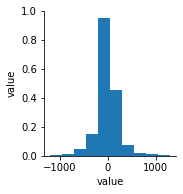

In [13]:
# Visualizings feature from this pandas file "value"
sns.pairplot(data = df_melt)

#  2. Feature visualization. 
Use `df_integrate` signal for extracting features (preferably small non-linear features on the section below)

In [14]:
df_integrate = value.copy()

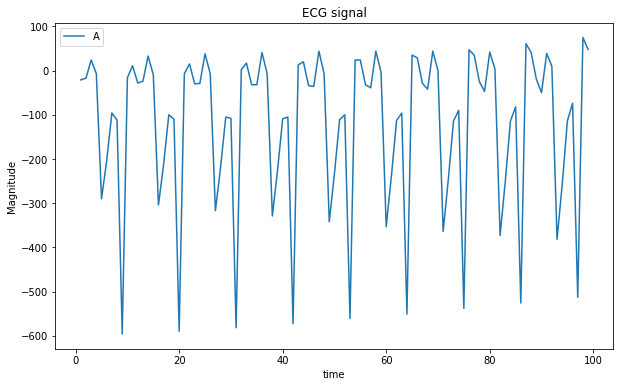

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df_integrate[1:100])
plt.title('ECG signal')
plt.ylabel('Magnitude')
plt.xlabel('time')
plt.legend('A0001')
plt.show()

#### 3. Convert Pandas to Numpy for easier integration with MIT code
Note the size is 12x7500 samples: 82500, which fits with our required sequence to integrate in hot-encode format (Deep learning labeling)

If easier for you, feature extration with numpy series might be easier for us to integrate

In [21]:
final_signal = value.values
final_signal

array([  7., -21., -17., ..., 195., 307., 214.])

In [17]:
final_signal.size

82500

#### Example of frequency features
please find already extracted features here from Pedro's insights:
https://drive.google.com/drive/folders/1s_MIE5xxMVbmJidIrtPVSEsqLfN5B-qz?usp=sharing 


In [18]:
def time_features(data, fs):
    data = data/sum(abs(data))
    step = len(data) / fs
    t = np.linspace(0, step, len(data), True)

    # Energy
    energy_aux = ((np.abs(data)) ** 2)
    energy_aux = energy_aux / np.sum(energy_aux)
    energy = integrate.simps(energy_aux, t)  # 1. Signal Energy

    # Autocorrelation
    corr = float(np.correlate(data, data))  # 2. Autocorrelation

    # Shannon Entropy
    pro = [np.mean(data == valor) for valor in set(data)]
    ent_shannon = sum(-q*np.log2(q) for q in pro)  # 3. Shannon Entropy

    # Centroid
    centroid = np.dot(t, energy_aux)/sum(energy_aux)  # 4. Centroid

    return energy, corr, ent_shannon, centroid


In [26]:
feat_1,feat_2,feat_3,feat_4 = time_features(df_integrate, 250)


In [29]:
Features_to_add = np.hstack([feat_1,feat_2, feat_3,feat_4])

# Features_to_add = [feat_1 feat_2 feat_3 feat_4 .. ]

Remarks: Please add features 1, 2, 3 [..] as afore-mentioned to direct integration with final code. 